In [72]:
import math
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from my_ecog_utils import read_with_annotations, get_multitaper_power_bands_narrow

In [73]:
memory_data_path = 'C:/Users/seand/Baylor College of Medicine/Haneef, Zulfi - Adel_SH_bak/RNS Project Data 2021 Edited.xlsx'

In [74]:
memory_data = pd.read_excel(memory_data_path)
memory_data.set_index('Participant_Number', inplace=True)

In [75]:
# index=['Participant_Number'], columns=['Words1_3', 'Words4_6', 'Words7_9', 'Words10_12']
three_word_groups = pd.DataFrame()
visit = np.where(memory_data['V1_Stim'] == 1, '1', '2')
three_word_groups['Stim_Visit'] = pd.Series(index=memory_data.index, data=visit)
three_word_groups

Stim_Visit
Participant_Number           
100                         1
101                         2
102                         2
103                         1
104                         1
105                         1
106                         2
107                         2
108                         2
109                         2
110                         2
111                         2
112                         1
113                         2
115                         1
200                         1
201                         2
202                         1
205                         2
206                         2
207                         2
208                         2
209                         2

In [76]:
for trial in range(4):
    idx, cols = pd.factorize('V'+three_word_groups['Stim_Visit']+'_Delay_Word_'+str(trial*3+1))
    w1 = memory_data.reindex(cols, axis=1).to_numpy()[np.arange(len(memory_data)), idx]

    idx, cols = pd.factorize('V'+three_word_groups['Stim_Visit']+'_Delay_Word_'+str(trial*3+2))
    w2 = memory_data.reindex(cols, axis=1).to_numpy()[np.arange(len(memory_data)), idx]

    idx, cols = pd.factorize('V'+three_word_groups['Stim_Visit']+'_Delay_Word_'+str(trial*3+3))
    w3 = memory_data.reindex(cols, axis=1).to_numpy()[np.arange(len(memory_data)), idx]

    three_word_groups[f'Words_{trial*3+1}_{trial*3+3}'] = w1 + w2 + w3

In [77]:
for trial in range(1, 4):
    for trio in range(4):
        idx, cols = pd.factorize('V'+three_word_groups['Stim_Visit']+f"_T{trial}_Word_{trio*3+1}")
        w1 = memory_data.reindex(cols, axis=1).to_numpy()[np.arange(len(memory_data)), idx]

        idx, cols = pd.factorize('V'+three_word_groups['Stim_Visit']+f"_T{trial}_Word_{trio*3+2}")
        w2 = memory_data.reindex(cols, axis=1).to_numpy()[np.arange(len(memory_data)), idx]

        idx, cols = pd.factorize('V'+three_word_groups['Stim_Visit']+f"_T{trial}_Word_{trio*3+3}")
        w3 = memory_data.reindex(cols, axis=1).to_numpy()[np.arange(len(memory_data)), idx]

        three_word_groups[f'Trial_{trial}_Words_{trio*3+1}_{trio*3+3}'] = w1 + w2 + w3

In [78]:
three_word_groups

Stim_Visit  Words_1_3  Words_4_6  Words_7_9  Words_10_12  \
Participant_Number                                                            
100                         1        1.0        1.0        2.0          0.0   
101                         2        2.0        0.0        1.0          1.0   
102                         2        3.0        3.0        1.0          0.0   
103                         1        3.0        3.0        3.0          1.0   
104                         1        2.0        0.0        1.0          0.0   
105                         1        2.0        0.0        1.0          0.0   
106                         2        3.0        3.0        3.0          3.0   
107                         2        NaN        NaN        NaN          NaN   
108                         2        2.0        1.0        3.0          0.0   
109                         2        3.0        0.0        2.0          1.0   
110                         2        1.0        0.0        2.0          2.0   
111                         2        2.0        2.0        2.0          2.0   
112                         1        2.0        3.0        3.0          1.0   
113                         2        2.0        2.0        1.0          3.0   
115                         1        2.0        0.0        1.0          1.0   
200                         1        2.0        1.0        1.0          0.0   
201                         2        3.0        1.0        1.0          2.0   
202                         1        1.0        2.0        1.0          1.0   
205                         2        NaN        NaN        NaN          NaN   
206                         2        2.0        0.0        2.0          2.0   
207                         2        NaN        NaN        NaN          NaN   
208                         2        NaN        NaN        NaN          NaN   
209                         2        NaN        NaN        NaN          NaN   

                    Trial_1_Words_1_3  Trial_1_Words_4_6  Trial_1_Words_7_9  \
Participant_Number                                                            
100                               2.0                0.0                1.0   
101                               3.0                0.0                0.0   
102                               3.0                1.0                1.0   
103                               3.0                1.0                2.0   
104                               3.0                0.0                0.0   
105                               3.0                1.0                1.0   
106                               2.0                3.0                2.0   
107                               NaN                NaN                NaN   
108                               1.0                0.0                1.0   
109                               1.0                0.0                2.0   
110                               2.0                1.0                1.0   
111                               3.0                1.0                2.0   
112                               2.0                1.0                2.0   
113                               3.0                1.0                1.0   
115                               1.0                0.0                0.0   
200                               1.0                1.0                1.0   
201                               2.0                1.0                2.0   
202                               1.0                1.0                1.0   
205                               NaN                NaN                NaN   
206                               3.0                0.0                0.0   
207                               NaN                NaN                NaN   
208                               NaN                NaN                NaN   
209                               NaN                NaN                NaN   

                    Trial_1_Words_10_12  Trial_2_Words_1_3  Trial_2

In [79]:
three_word_groups.to_csv('three_words_delay.csv', index=True)

## Power Calcs

generate using `gamma_split.ipynb`

In [80]:
power_log_chg = pd.read_csv('power_log_chg.csv')

In [81]:
power_log_chg

ID  Trial        Channel    Delta_post    Theta_post    Alpha_post  \
0    100      1  LHip1 - LHip2  1.142425e-07  7.161263e-08  2.537439e-08   
1    100      1  LHip1 - LHip2  5.835947e-08  3.228662e-08  2.086371e-08   
2    100      1  LHip1 - LHip2  5.101078e-08  3.540437e-08  3.576591e-08   
3    100      1  LHip1 - LHip2  8.638911e-08  8.010154e-08  4.598185e-08   
4    100      1  LHip3 - LHip4  3.784396e-07  7.526684e-08  5.945997e-09   
..   ...    ...            ...           ...           ...           ...   
443  115      3  RHip1 - RHip2  9.711323e-08  5.704873e-08  2.026480e-08   
444  115      3  RHip3 - RHip4  1.015564e-07  2.902442e-08  3.397387e-09   
445  115      3  RHip3 - RHip4  3.798705e-08  1.329936e-08  2.844349e-09   
446  115      3  RHip3 - RHip4  9.366525e-08  3.898334e-08  1.177374e-08   
447  115      3  RHip3 - RHip4  9.523928e-08  4.836225e-08  8.531949e-09   

        Beta_post    Gamma_post  Stim_Num     Delta_pre     Theta_pre  \
0    1.169223e-08  6.854174e-10         1  7.676245e-08  7.966128e-08   
1    8.328850e-09  7.199653e-10         2  7.676245e-08  7.966128e-08   
2    1.402683e-08  6.067107e-10         3  7.676245e-08  7.966128e-08   
3    9.420390e-09  5.334231e-10         4  7.676245e-08  7.966128e-08   
4    3.396220e-09  4.870411e-10         1  7.599882e-08  5.435899e-08   
..            ...           ...       ...           ...           ...   
443  1.892534e-09  1.022950e-10         4  6.394327e-08  1.257479e-08   
444  1.678384e-09  1.538645e-10         1  5.952048e-08  1.537873e-08   
445  1.064764e-09  1.290604e-10         2  5.952048e-08  1.537873e-08   
446  1.676138e-09  2.128235e-10         3  5.952048e-08  1.537873e-08   
447  1.652413e-09  1.153763e-10         4  5.952048e-08  1.537873e-08   

        Alpha_pre      Beta_pre     Gamma_pre  Delta_log_chg  Theta_log_chg  \
0    3.897899e-08  1.350653e-08  8.706455e-10       0.172679      -0.046258   
1    3.897899e-08  1.350653e-08  8.706455e-10      -0.119037      -0.392225   
2    3.897899e-08  1.350653e-08  8.706455e-10      -0.177487      -0.352190   
3    3.897899e-08  1.350653e-08  8.706455e-10       0.051310       0.002394   
4    7.955522e-09  3.615457e-09  4.294396e-10       0.697190       0.141332   
..            ...           ...           ...            ...            ...   
443  7.871698e-09  1.820777e-09  1.573105e-10       0.181484       0.656745   
444  4.737987e-09  1.855336e-09  2.623488e-10       0.232041       0.275843   
445  4.737987e-09  1.855336e-09  2.623488e-10      -0.195031      -0.063090   
446  4.737987e-09  1.855336e-09  2.623488e-10       0.196912       0.403959   
447  4.737987e-09  1.855336e-09  2.623488e-10       0.204150       0.497586   

     Alpha_log_chg  Beta_log_chg  Gamma_log_chg  
0        -0.186435     -0.062647      -0.103886  
1        -0.271439     -0.209959      -0.082530  
2        -0.037361      0.016416      -0.156860  
3         0.071756     -0.156475      -0.212770  
4        -0.126444     -0.027167       0.054663  
..             ...           ...            ...  
443       0.410674      0.016787      -0.186903  
444      -0.144449     -0.043531      -0.231741  
445      -0.221611     -0.241169      -0.308086  
446       0.395321     -0.044113      -0.090860  
447       0.255454     -0.050304      -0.356763  

[448 rows x 19 columns]

In [82]:
# pt 103 had 5 stims on trials 2 and 3. We'll asssume that the 5th was administered after all 12 words were presented
power_log_chg = power_log_chg[power_log_chg['Stim_Num'] != 5]
power_and_mem = power_log_chg.merge(three_word_groups, left_on='ID', right_on='Participant_Number')

In [83]:
power_and_mem['Prev_Trio'] = power_and_mem.loc[power_and_mem['Stim_Num'] == 1, 'Words_1_3']
power_and_mem['Prev_Trio'] = power_and_mem['Prev_Trio'].fillna(power_and_mem.loc[(power_and_mem['Stim_Num'] == 2), 'Words_4_6'])
power_and_mem['Prev_Trio'] = power_and_mem['Prev_Trio'].fillna(power_and_mem.loc[(power_and_mem['Stim_Num'] == 3), 'Words_7_9'])
power_and_mem['Prev_Trio'] = power_and_mem['Prev_Trio'].fillna(power_and_mem.loc[(power_and_mem['Stim_Num'] == 4), 'Words_10_12'])

In [84]:
power_and_mem['Next_Trio'] = power_and_mem.loc[power_and_mem['Stim_Num'] == 1, 'Words_4_6']
power_and_mem['Next_Trio'] = power_and_mem['Next_Trio'].fillna(power_and_mem.loc[(power_and_mem['Stim_Num'] == 2), 'Words_7_9'])
power_and_mem['Next_Trio'] = power_and_mem['Next_Trio'].fillna(power_and_mem.loc[(power_and_mem['Stim_Num'] == 3), 'Words_10_12'])
# power_and_mem['Next_Trio'] = power_and_mem['Next_Trio'].fillna(power_and_mem.loc[(power_and_mem['Stim_Num'] == 4), 'Words_10_12'])

In [85]:
power_and_mem = power_and_mem.dropna()

In [86]:
from stats_pipeline import do_stats

In [87]:
power_and_mem

ID  Trial        Channel    Delta_post    Theta_post    Alpha_post  \
0    100      1  LHip1 - LHip2  1.142425e-07  7.161263e-08  2.537439e-08   
1    100      1  LHip1 - LHip2  5.835947e-08  3.228662e-08  2.086371e-08   
2    100      1  LHip1 - LHip2  5.101078e-08  3.540437e-08  3.576591e-08   
4    100      1  LHip3 - LHip4  3.784396e-07  7.526684e-08  5.945997e-09   
5    100      1  LHip3 - LHip4  2.610628e-07  3.374374e-08  1.217944e-08   
..   ...    ...            ...           ...           ...           ...   
433  115      3  RHip1 - RHip2  6.971829e-08  1.827316e-08  2.384228e-09   
434  115      3  RHip1 - RHip2  7.666256e-08  2.439320e-08  9.129314e-09   
436  115      3  RHip3 - RHip4  1.015564e-07  2.902442e-08  3.397387e-09   
437  115      3  RHip3 - RHip4  3.798705e-08  1.329936e-08  2.844349e-09   
438  115      3  RHip3 - RHip4  9.366525e-08  3.898334e-08  1.177374e-08   

        Beta_post    Gamma_post  Stim_Num     Delta_pre  ...  \
0    1.169223e-08  6.854174e-10         1  7.676245e-08  ...   
1    8.328850e-09  7.199653e-10         2  7.676245e-08  ...   
2    1.402683e-08  6.067107e-10         3  7.676245e-08  ...   
4    3.396220e-09  4.870411e-10         1  7.599882e-08  ...   
5    5.322947e-09  3.627103e-10         2  7.599882e-08  ...   
..            ...           ...       ...           ...  ...   
433  9.854548e-10  1.249294e-10         2  6.394327e-08  ...   
434  3.128178e-09  1.003787e-10         3  6.394327e-08  ...   
436  1.678384e-09  1.538645e-10         1  5.952048e-08  ...   
437  1.064764e-09  1.290604e-10         2  5.952048e-08  ...   
438  1.676138e-09  2.128235e-10         3  5.952048e-08  ...   

     Trial_2_Words_1_3  Trial_2_Words_4_6  Trial_2_Words_7_9  \
0                  2.0                1.0                1.0   
1                  2.0                1.0                1.0   
2                  2.0                1.0                1.0   
4                  2.0                1.0                1.0   
5                  2.0                1.0                1.0   
..                 ...                ...                ...   
433                3.0                0.0                0.0   
434                3.0                0.0                0.0   
436                3.0                0.0                0.0   
437                3.0                0.0                0.0   
438                3.0                0.0                0.0   

     Trial_2_Words_10_12  Trial_3_Words_1_3  Trial_3_Words_4_6  \
0                    2.0                3.0                2.0   
1                    2.0                3.0                2.0   
2                    2.0                3.0                2.0   
4                    2.0                3.0                2.0   
5                    2.0                3.0                2.0   
..                   ...                ...                ...   
433                  3.0                2.0                1.0   
434                  3.0                2.0                1.0   
436                  3.0                2.0                1.0   
437                  3.0                2.0                1.0   
438                  3.0                2.0                1.0   

     Trial_3_Words_7_9  Trial_3_Words_10_12  Prev_Trio Next_Trio  
0                  0.0                  1.0        1.0       1.0  
1                  0.0                  1.0        1.0       2.0  
2                  0.0                  1.0        2.0       0.0  
4                  0.0                  1.0        1.0       1.0  
5                  0.0                  1.0        1.0       2.0  
..                 ...                  ...        ...       ...  
433                0.0                  2.0        0.0       1.0  
434                0.0                  2.0        1.0       1.0  
436                0.0                  2.0        2.0       0.0  
437                0.0                  2.0        0.0       1.0  
438                0.0   

In [88]:
import importlib
import stats_pipeline
importlib.reload(stats_pipeline)
from stats_pipeline import do_stats

## Previous Trio

TODO the "Beta" here is actually Theta (4-7), based on some literature I read up on

In [89]:
do_stats(power_and_mem, '$FREQ_log_chg', 'Prev_Trio', perm_pval=True, mem_null_hyp=1.5, show_all_p=True, freqs=['Delta', 'Beta', 'GammaLow', 'GammaMed', 'GammaHigh', 'GammaXHigh'], force_avg='stim')

TypeError: do_stats() got an unexpected keyword argument 'perm_pval'

## Next Trio

In [ ]:
raise Exception()

Exception: 

Averaging across trials in the same patient, channel, and stim
Fisher Exact P-value = 0.3614551083591324 for GammaXHigh band in LHip1 - LHip2


Power         
                Decrease Increase
Memory Decrease        2        8
       Increase        5        6

Fisher Exact P-value = 0.3614551083591324 for Delta band in LHip3 - LHip4


Power         
                Decrease Increase
Memory Decrease        2        8
       Increase        5        6

Fisher Exact P-value = 0.1826625386996904 for GammaMed band in LHip3 - LHip4


Power         
                Decrease Increase
Memory Decrease        8        2
       Increase        5        6

Fisher Exact P-value = 0.3948559180757323 for GammaHigh band in LHip3 - LHip4


Power         
                Decrease Increase
Memory Decrease        6        4
       Increase        4        7

Fisher Exact P-value = 0.3107769423558892 for Delta band in RHip1 - RHip2


Power         
                Decrease Increase
Memory Decrease        4        7
       Increase        1        9

Fisher Exact P-value = 0.3948559180757323 for GammaXHigh band in RHip1 - RHip2


Power         
                Decrease Increase
Memory Decrease        4        7
       Increase        6        4

Fisher Exact P-value = 0.04977375565610872 for GammaLow band in RHip3 - RHip4


Power         
                Decrease Increase
Memory Decrease        6        3
       Increase        1        8

Channel   Frequency         r         P
0   LHip1 - LHip2       Delta -0.045613  0.949334
1   LHip1 - LHip2        Beta -0.069551  0.898873
2   LHip1 - LHip2    GammaLow -0.267880  0.340518
3   LHip1 - LHip2    GammaMed -0.161265  0.611213
4   LHip1 - LHip2   GammaHigh  0.129740  0.445754
5   LHip1 - LHip2  GammaXHigh -0.192077  0.408772
6   LHip3 - LHip4       Delta -0.111798  0.611213
7   LHip3 - LHip4        Beta  0.130713  0.408772
8   LHip3 - LHip4    GammaLow -0.137013  0.567400
9   LHip3 - LHip4    GammaMed  0.223268  0.484570
10  LHip3 - LHip4   GammaHigh  0.113711  0.525149
11  LHip3 - LHip4  GammaXHigh -0.017599  0.898873
12  RHip1 - RHip2       Delta -0.084327  0.874595
13  RHip1 - RHip2        Beta  0.091918  0.974819
14  RHip1 - RHip2    GammaLow  0.085710  0.874595
15  RHip1 - RHip2    GammaMed  0.021661  0.635875
16  RHip1 - RHip2   GammaHigh  0.026567  0.728430
17  RHip1 - RHip2  GammaXHigh -0.141119  0.467842
18  RHip3 - RHip4       Delta  0.203593  0.452510
19  RHip3 - RHip4        Beta  0.088348  0.553127
20  RHip3 - RHip4    GammaLow  0.423983  0.043750
21  RHip3 - RHip4    GammaMed -0.131773  0.501482
22  RHip3 - RHip4   GammaHigh -0.064486  0.968461
23  RHip3 - RHip4  GammaXHigh  0.177934  0.553127

Linear regression:


Frequency         Delta      Beta  GammaLow  GammaMed  GammaHigh  GammaXHigh
Channel                                                                     
LHip1 - LHip2  0.974819  0.974819  0.953812  0.953812   0.953812    0.953812
LHip3 - LHip4  0.953812  0.953812  0.953812  0.953812   0.953812    0.974819
RHip1 - RHip2  0.974819  0.974819  0.974819  0.953812   0.974819    0.953812
RHip3 - RHip4  0.953812  0.953812  0.953812  0.953812   0.974819    0.953812

Fisher Exact:


Frequency      Delta  Beta  GammaLow  GammaMed  GammaHigh  GammaXHigh
Channel                                                              
LHip1 - LHip2    1.0   1.0       1.0       1.0        1.0         1.0
LHip3 - LHip4    1.0   1.0       1.0       1.0        1.0         1.0
RHip1 - RHip2    1.0   1.0       1.0       1.0        1.0         1.0
RHip3 - RHip4    1.0   1.0       1.0       1.0        1.0         1.0

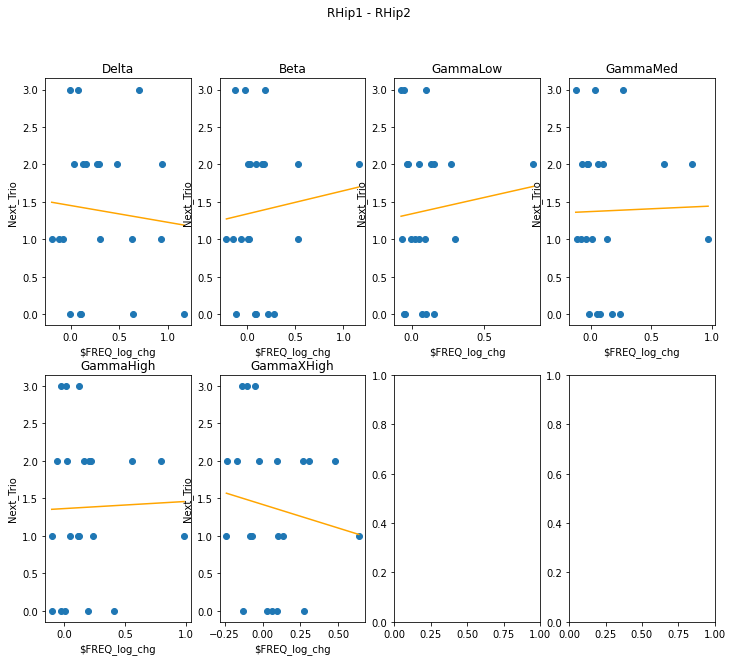

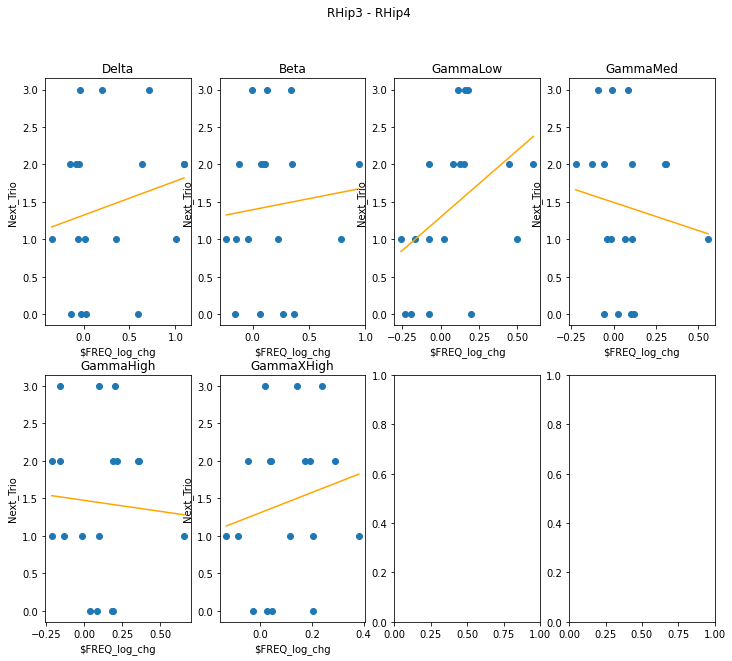

In [ ]:
do_stats(power_and_mem, '$FREQ_log_chg', 'Next_Trio', mem_null_hyp=1.5, show_all_p=True, freqs=['Delta', 'Beta', 'GammaLow', 'GammaMed', 'GammaHigh', 'GammaXHigh'], force_avg='stim')

In [ ]:
power_and_mem[power_and_mem['Channel'] == 'RHip3 - RHip4']

ID  Trial        Channel    Delta_post     Beta_post  GammaLow_post  \
92   105      1  RHip3 - RHip4  4.053941e-09  9.245727e-10   1.275866e-10   
93   105      1  RHip3 - RHip4  1.256694e-09  6.692709e-10   2.145552e-10   
94   105      1  RHip3 - RHip4  1.533777e-09  2.240018e-09   1.228526e-10   
108  105      2  RHip3 - RHip4  1.750690e-09  1.649490e-09   1.310437e-10   
109  105      2  RHip3 - RHip4  1.813533e-09  2.002400e-09   9.461672e-11   
110  105      2  RHip3 - RHip4  4.066996e-09  1.119777e-09   2.285281e-10   
124  105      3  RHip3 - RHip4  1.422889e-09  9.447191e-10   1.914214e-10   
125  105      3  RHip3 - RHip4  1.037025e-09  3.238672e-09   3.485904e-10   
126  105      3  RHip3 - RHip4  4.978163e-09  2.398757e-09   8.751131e-11   
236  110      1  RHip3 - RHip4  1.062992e-07  3.900744e-08   5.110636e-10   
237  110      1  RHip3 - RHip4  3.084091e-08  8.439405e-09   5.108910e-10   
238  110      1  RHip3 - RHip4  9.727168e-08  2.567892e-08   9.640248e-10   
252  110      2  RHip3 - RHip4  9.899293e-09  2.378856e-09   2.600704e-10   
253  110      2  RHip3 - RHip4  2.667515e-08  3.104499e-09   6.716065e-10   
254  110      2  RHip3 - RHip4  4.236033e-08  4.485009e-08   1.757881e-09   
265  110      3  RHip3 - RHip4  1.681131e-08  7.556374e-09   6.843933e-10   
266  110      3  RHip3 - RHip4  2.807294e-08  4.558353e-09   1.596737e-10   
267  110      3  RHip3 - RHip4  1.323262e-07  3.208993e-08   8.750659e-10   
280  111      1  RHip3 - RHip4  3.769398e-09  7.115411e-09   3.245807e-10   
281  111      1  RHip3 - RHip4  6.450608e-09  2.586395e-09   2.182738e-10   
282  111      1  RHip3 - RHip4  3.951194e-09  4.982987e-09   2.362910e-10   
296  111      2  RHip3 - RHip4  5.262441e-09  2.208993e-09   3.709382e-10   
297  111      2  RHip3 - RHip4  2.278499e-09  2.183206e-09   3.871477e-10   
298  111      2  RHip3 - RHip4  5.881936e-09  2.736810e-09   1.769487e-10   
309  112      1  RHip3 - RHip4  2.403811e-08  7.062582e-10   8.091637e-10   
310  112      1  RHip3 - RHip4  9.048982e-09  1.297940e-09   8.535750e-10   
324  112      2  RHip3 - RHip4  1.616008e-08  1.282441e-09   6.390859e-10   
325  112      2  RHip3 - RHip4  1.870284e-08  1.059247e-09   2.859279e-10   
326  112      2  RHip3 - RHip4  2.957375e-08  3.929567e-10   3.639049e-10   
340  112      3  RHip3 - RHip4  2.651423e-08  1.378582e-09   2.335124e-10   
341  112      3  RHip3 - RHip4  1.102414e-08  2.263626e-09   3.659365e-10   
342  112      3  RHip3 - RHip4  1.734261e-08  1.775842e-09   1.930401e-10   
356  113      1  RHip3 - RHip4  9.642239e-07  5.275463e-08   7.616304e-09   
357  113      1  RHip3 - RHip4  7.571670e-07  1.346197e-07   8.245440e-09   
358  113      1  RHip3 - RHip4  9.552409e-08  4.325099e-08   2.707451e-09   
372  113      2  RHip3 - RHip4  1.659548e-07  3.318558e-08   2.093028e-09   
373  113      2  RHip3 - RHip4  4.294509e-08  6.154349e-08   1.659643e-09   
374  113      2  RHip3 - RHip4  1.271493e-07  4.428069e-08   1.914383e-09   
388  113      3  RHip3 - RHip4  9.735857e-08  2.741737e-08   1.586841e-09   
389  113      3  RHip3 - RHip4  2.586543e-07  1.189113e-07   2.618641e-09   
390  113      3  RHip3 - RHip4  9.645156e-08  2.414094e-08   7.690247e-10   
404  115      1  RHip3 - RHip4  2.996070e-08  2.725844e-09   4.122939e-10   
405  115      1  RHip3 - RHip4  1.092325e-07  4.349804e-09   3.127175e-10   
406  115      1  RHip3 - RHip4  5.014634e-08  5.462215e-09   5.810889e-10   
420  115      2  RHip3 - RHip4  5.419935e-08  1.411057e-09   6.565322e-10   
421  115      2  RHip3 - RHip4  5.399145e-08  3.589268e-09   4.211989e-10   
422  115      2  RHip3 - RHip4  2.704048e-08  8.659479e-10   3.558431e-10   
436  115      3  RHip3 - RHip4  1.015435e-07  2.803268e-09   2.338872e-10   
437  115      3  RHip3 - RHip4  3.798745e-08  1.586232e-09   2.532490e-10   
438  115      3  RHip3 - RHip4  9.363271e-08  2.506926e-09   6.041656e-10   

     GammaMed_post  GammaHigh_post  GammaXHigh_post  Stim_Num  ...  \
92    5.

The linear regressions are some of the flattest correlations I've ever seen, but given the fact that there are only 4 discrete y-values, I'm not surprised. The two-way tables are a bit more interesting. For reference, the memory is split between 0-1 vs 2-3, since I can't compare to baseline for each word group (no correlation since they're different word lists). This gives a consistent pattern where the decrease power group is split 2:1 between low memory and high memory, whereas the increase power group is split closer to 1.2:1. For each individual frequency, this isn't quite significant because the error bars overlap, but I wonder if combining all of the frequency bands into one data pool would be a valid statistical anlysis. Would that even mean anything?

For now, I've decided to sanity check that there is a correlation between power and memory by looking at the power for the whole baseline recording and looking for a correlation betweeen that and memory. Gonna have to do some relabeling first. Time to make a new notebook.